In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
# look for the unique categories in each categorical variable 

print("Categories in 'gender' variable:  ", end = "")
print(df['gender'].unique())

print("Categories in 'race_ethinicity' variable:  ", end = "")
print(df['race_ethnicity'].unique())

print("categories in 'parental_level_of_education' variable:  ", end = "")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable :  ", end = "")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:  ", end = "")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethinicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable :  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['none' 'completed']


In [16]:
# define numerical and categorical columns
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

print("we have {} numerical features:  {}".format(len(numerical_feature), numerical_feature))
print("we have {} categorical features:  {}".format(len(categorical_feature), categorical_feature))

we have 3 numerical features:  ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [17]:
# adding columns for total_score and average _score 

df['total_score'] = df['math_score']+df['writing_score']+df['reading_score']
df['Average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
reading_full = df[df['reading_score'] == 100]['Average'].count()
writing_full = df[df['writing_score'] == 100]['Average'].count()
math_full = df[df['math_score'] == 100]['Average'].count()

print(f"Number of students with full marks in reading : {math_full}")
print(f"Number of students with full marks in writing: {writing_full}")
print(f"Number of students with full marks in reading: {reading_full}")

Number of students with full marks in reading : 7
Number of students with full marks in writing: 14
Number of students with full marks in reading: 17


In [20]:
reading_less_than20 = df[df['reading_score'] <= 20]['Average'].count()
writing_less_than20 = df[df['writing_score'] <= 20]['Average'].count()
math_less_than20 = df[df['math_score'] <= 20]['Average'].count()

print(f"Number of students with score less than 20 in reading : {reading_less_than20}")
print(f"Number of students with score less tahn 20 in writing : {writing_less_than20}")
print(f"Number of students with score less tahn 20 in maths : {math_less_than20}")

Number of students with score less than 20 in reading : 1
Number of students with score less tahn 20 in writing : 3
Number of students with score less tahn 20 in maths : 4


In [21]:
# studenst performed best in reading
# and worst in maths 

In [22]:
# data Visualization 

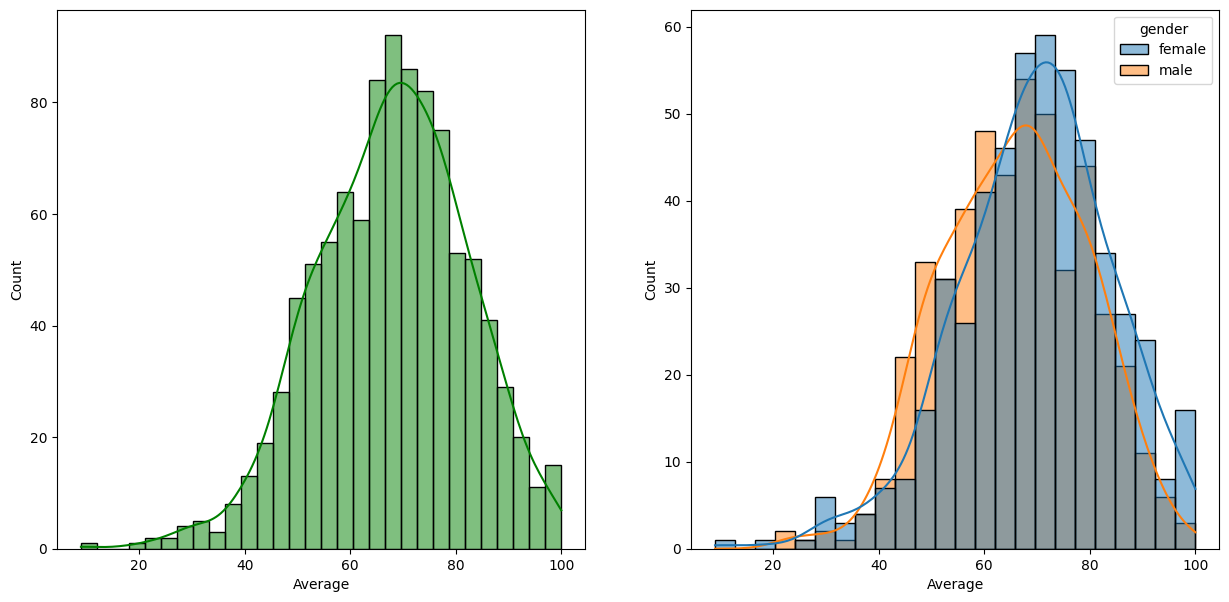

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()

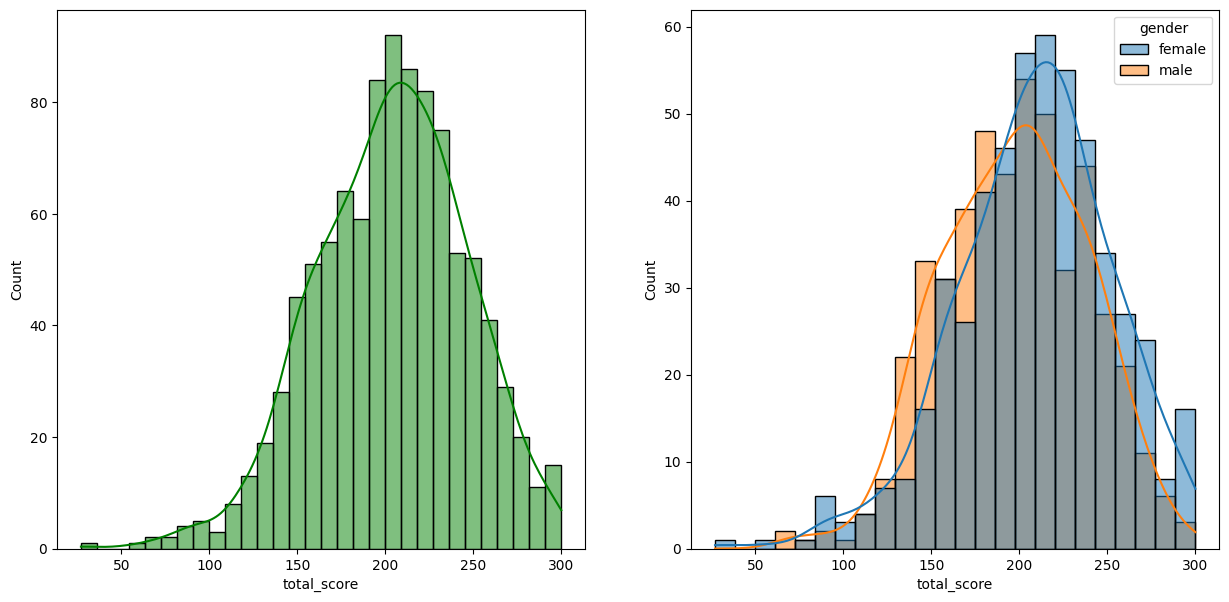

In [28]:
fig, axs = plt.subplots(1, 2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = 'total_score', kde = True, bins = 30, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'total_score', kde = True, hue = 'gender')
plt.show()

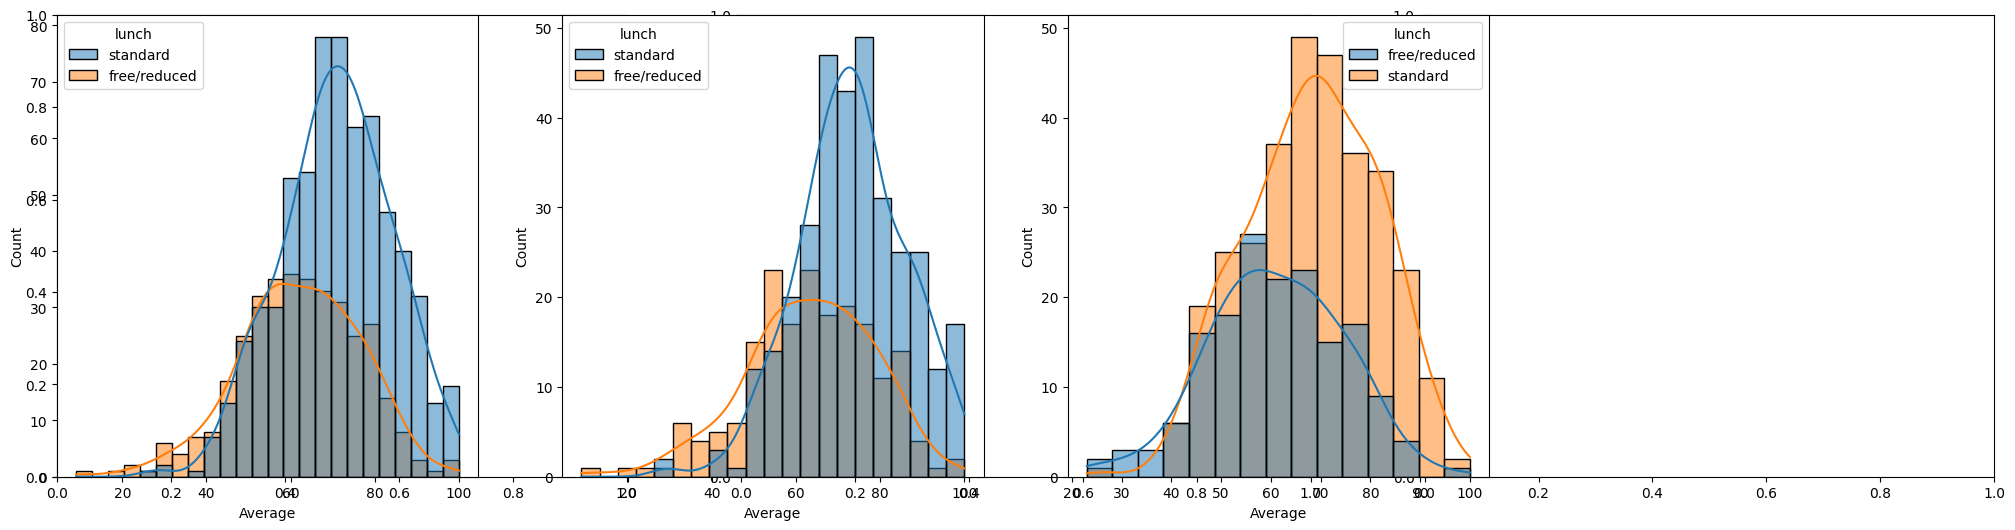

In [29]:
plt.subplots(1,3, figsize = (25, 6))
plt.subplot(141)
sns.histplot(data = df, x = 'Average', kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'], x = 'Average', kde = True, hue = 'lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'Average', kde = True, hue = 'lunch')
plt.show()

In [34]:
# conclusion : standard lunch helps perform well in exam be it male or female 

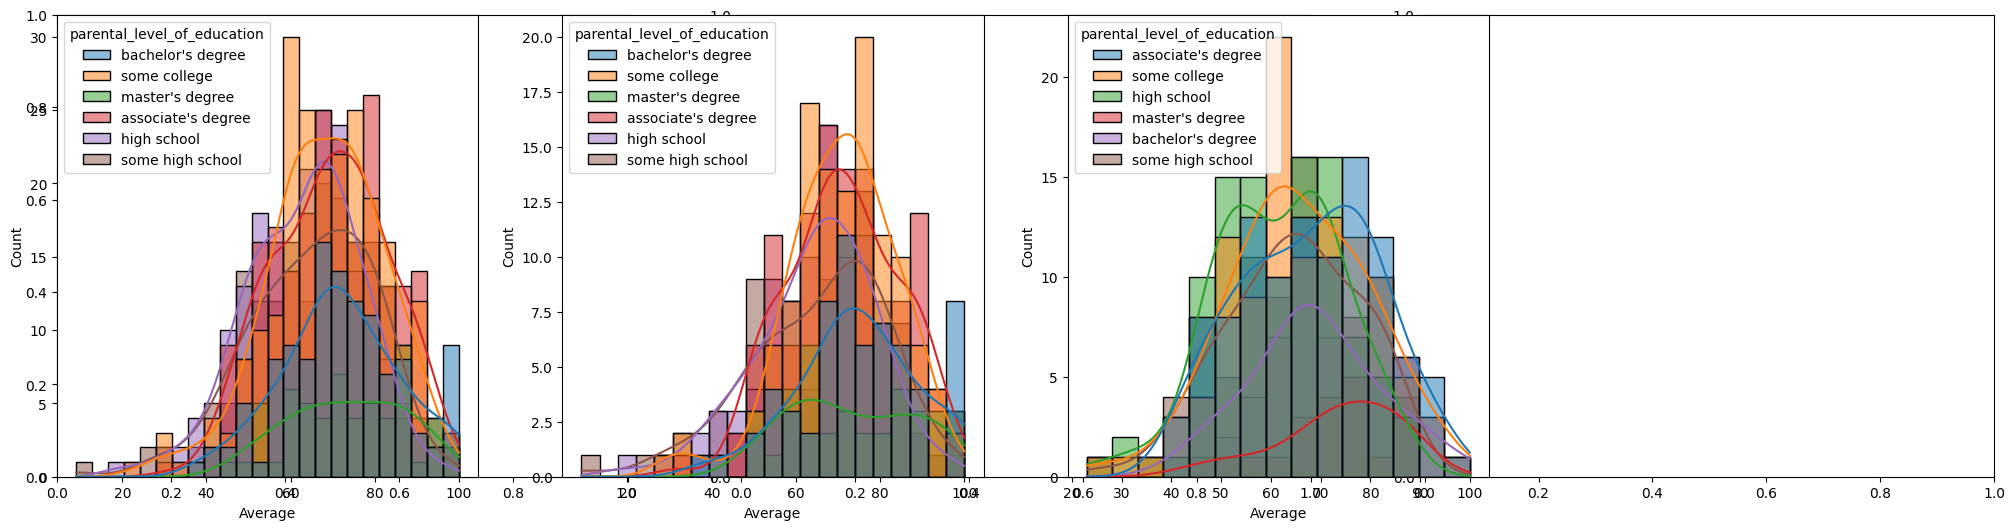

In [38]:
plt.subplots(1,3, figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'Average', kde = True, hue = 'parental_level_of_education')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'], x = 'Average', kde = True, hue = 'parental_level_of_education')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'Average', kde = True, hue = 'parental_level_of_education')
plt.show()

In [42]:
# In general parent's education don't help student perform well in exam.
# - 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
# - 3rd plot we can see there is no effect of parent's education on female students.

In [43]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


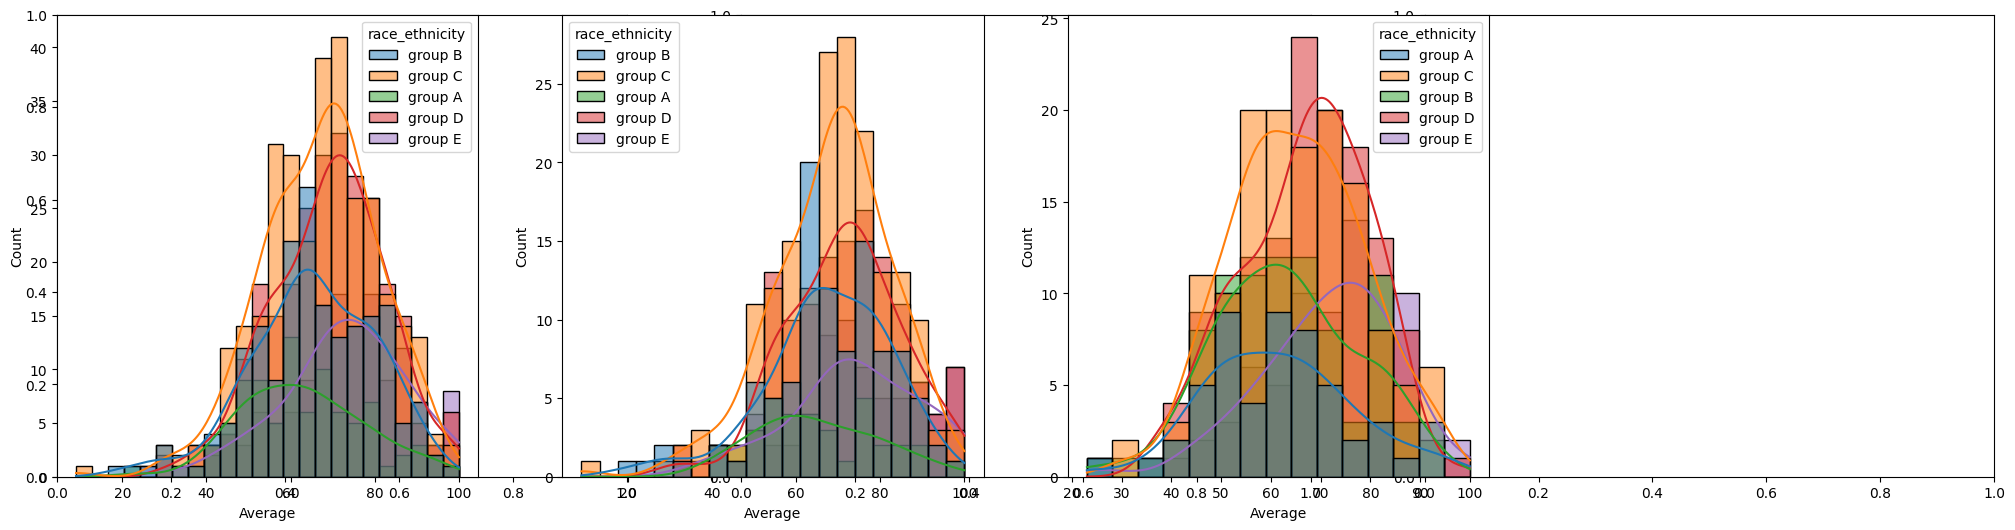

In [44]:
plt.subplots(1,3, figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'Average', kde = True, hue = 'race_ethnicity')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'], x = 'Average', kde = True, hue = 'race_ethnicity')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'Average', kde = True, hue = 'race_ethnicity')
plt.show()

In [45]:
# #####  Insights
# - Students of group A and group B tends to perform poorly in exam.
# - Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

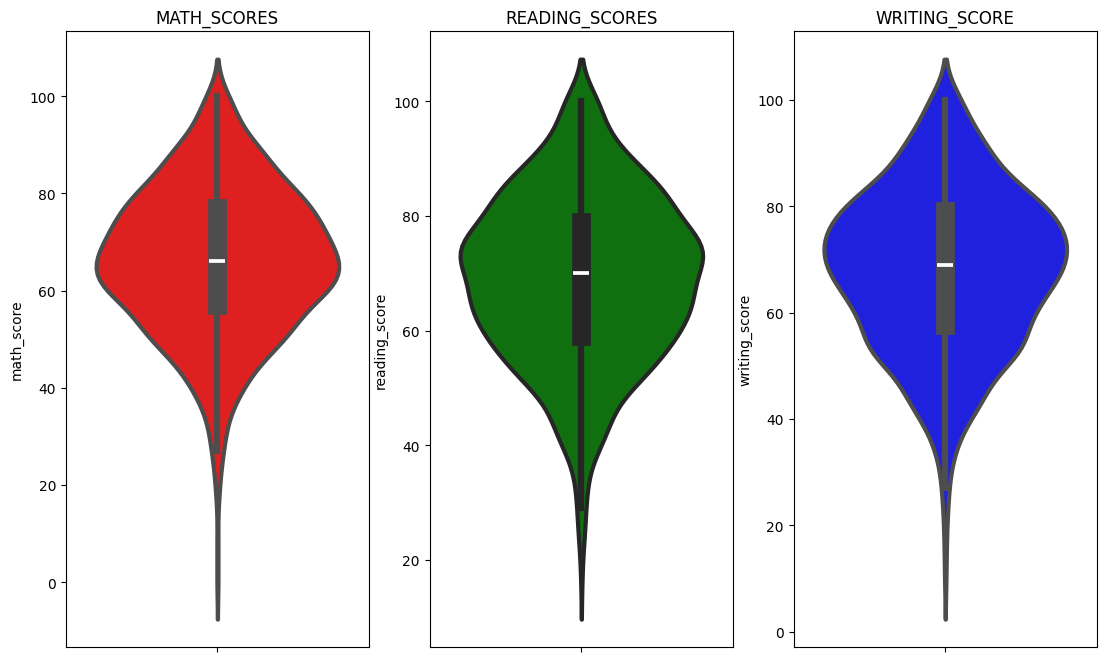

In [46]:
plt.figure(figsize = (18,8))
plt.subplot(1 ,4, 1)
plt.title('MATH_SCORES')
sns.violinplot(data = df, y = 'math_score', color='red', linewidth= 3)
plt.subplot(1,4,2)
plt.title('READING_SCORES')
sns.violinplot(data = df, y = 'reading_score', color = 'green', linewidth = 3)
plt.subplot(1,4,3)
plt.title('WRITING_SCORE')
sns.violinplot(data = df, y = 'writing_score', color = 'blue', linewidth = 3)
plt.show()

In [47]:
# most students scored in between 50-80 in maths 
# while in writing and reading most students scored between 50-80

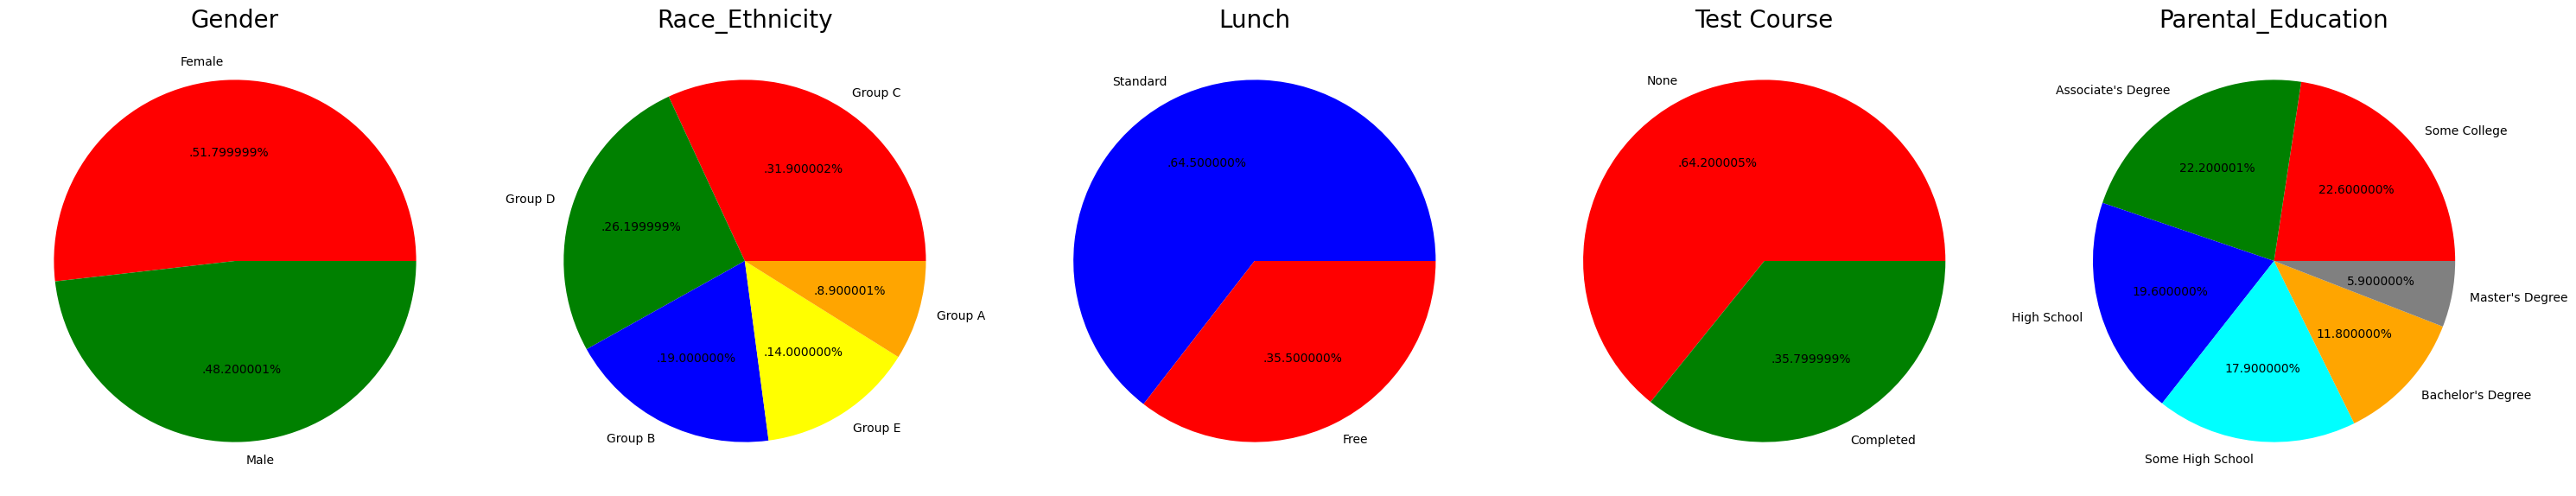

In [51]:
# Multivariate analysis using pieplot

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors  = color, labels = labels, autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'yellow', 'orange']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['blue', 'red']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color, labels = labels, autopct = '%2f%%')
plt.title('Parental_Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()


In [ ]:
# #####  Insights
# - Number of Male and Female students is almost equal
# - Number students are greatest in Group C
# - Number of students who have standard lunch are greater
# - Number of students who have not enrolled in any test preparation course is greater
# - Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

In [52]:
# #### 4.4 Feature Wise Visualization
# #### 4.4.1 GENDER COLUMN
# - How is distribution of Gender ?
# - Is gender has any impact on student's performance ?

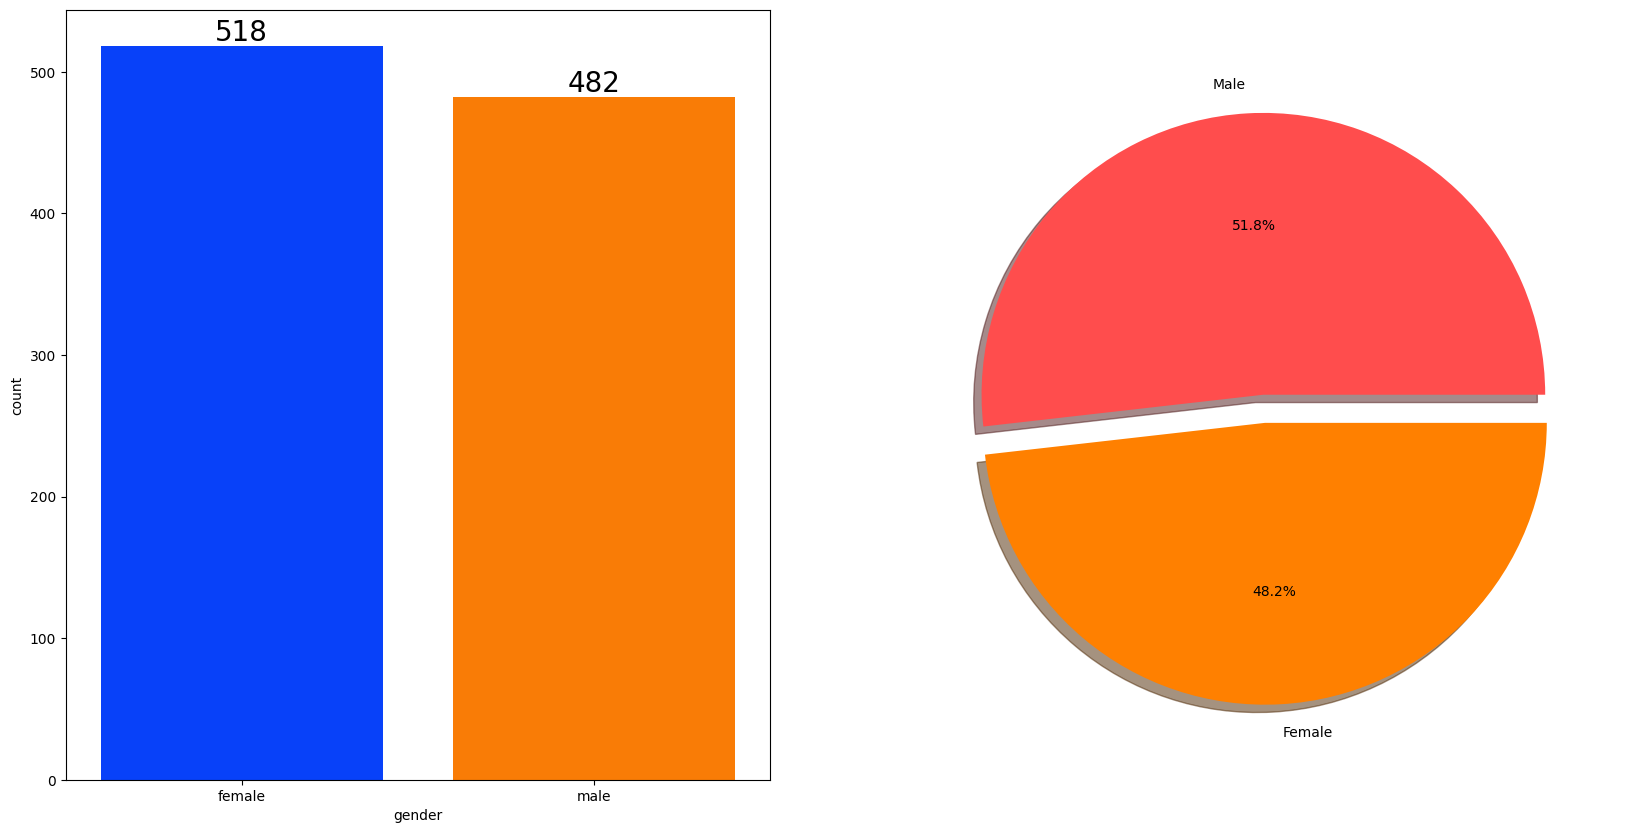

In [53]:
# univariate Analysis (distribution of gender)

f, ax = plt.subplots(1,2,figsize = (20, 10))
sns.countplot(x=df['gender'], data = df, palette = 'bright', ax = ax[0], saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)
    
plt.pie(x=df['gender'].value_counts(), labels = ['Male', 'Female'], explode = [0, 0.1], autopct = '%1.1f%%', shadow = True, colors = ['#ff4d4d', '#ff8000'])
plt.show()

In [54]:
#### Insights 
# - Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

In [56]:
# Bivariate analysis (is gender has any impact on student performance )

gender_group = df.groupby('gender').mean(numeric_only = True)
gender_group

,math_score,reading_score,writing_score,total_score,Average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


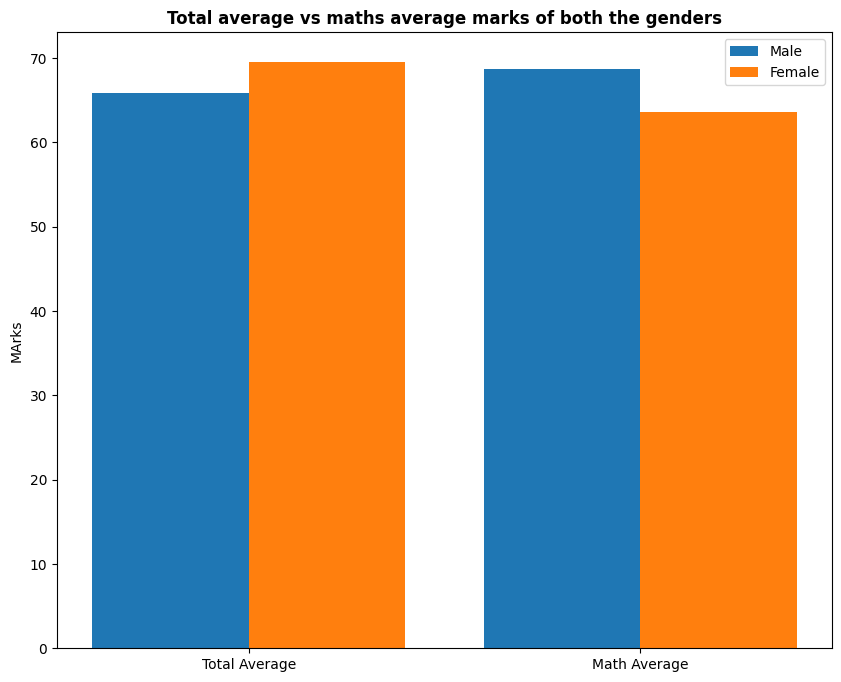

In [59]:
plt.figure(figsize = (10,8))

X = ['Total Average', 'Math Average']

female_scores = gender_group['Average'][0], gender_group['math_score'][0]
male_scores = gender_group['Average'][1], gender_group['math_score'][1]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel('MArks')
plt.title('Total average vs maths average marks of both the genders', fontweight = 'bold')
plt.legend()
plt.show()

In [60]:
# #### Insights 
# - On an average females have a better overall score than men.
# - whereas males have scored higher in Maths.

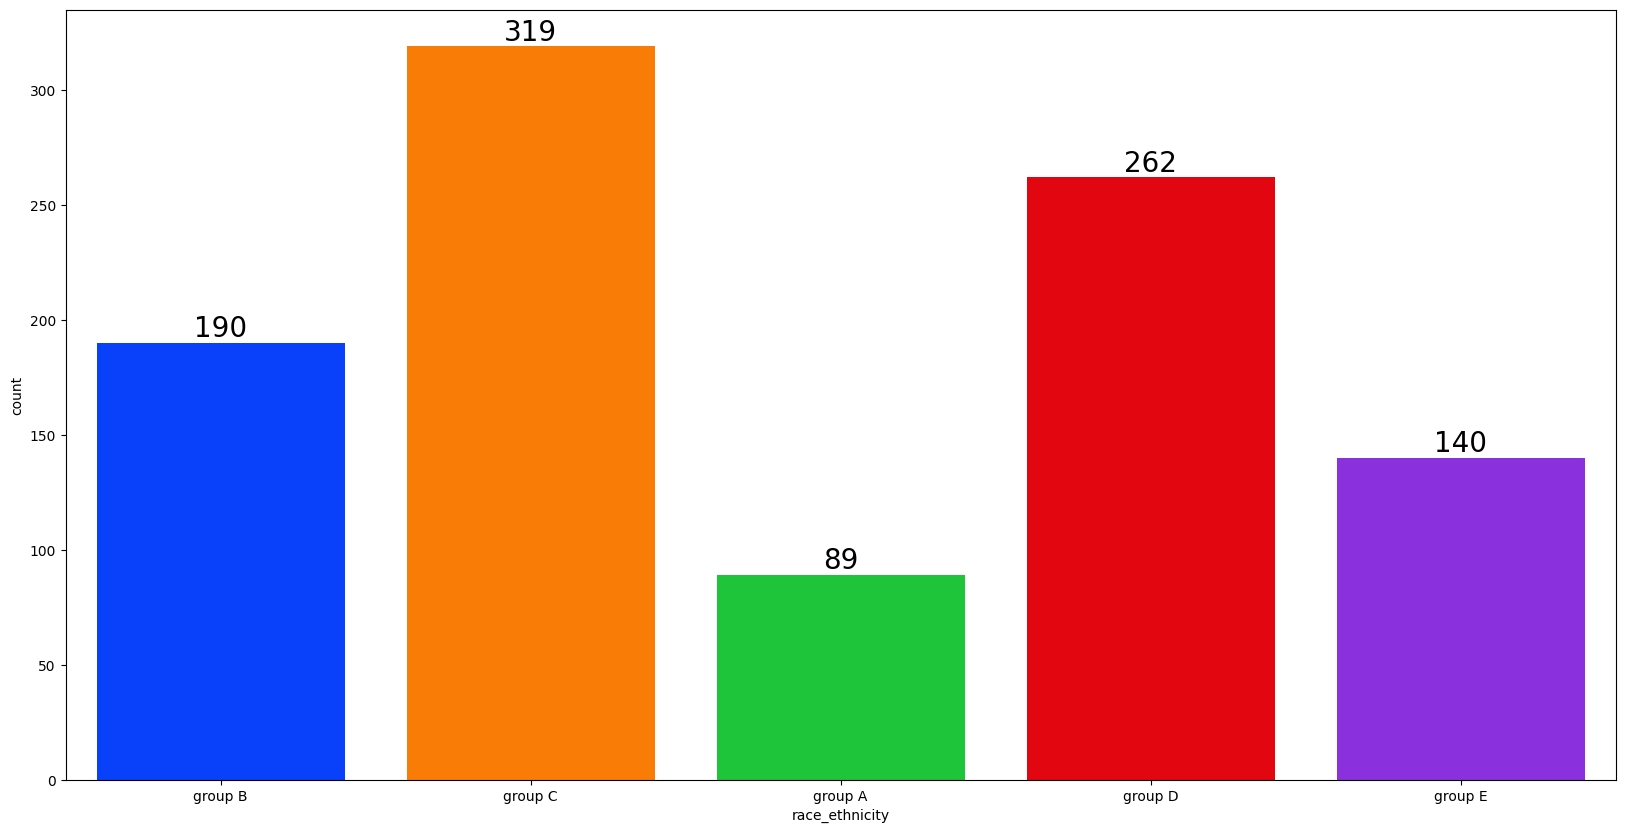

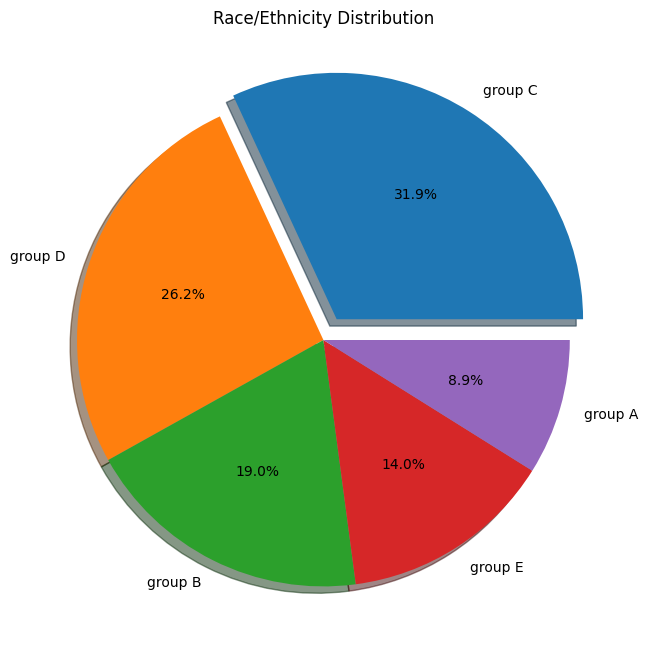

In [68]:
# Countplot (optional)
f, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', saturation=0.95)
for container in ax.containers:
    ax.bar_label(container, color='black', size=20)

# New figure for pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    x=df['race_ethnicity'].value_counts(),
    labels=df['race_ethnicity'].value_counts().index,
    explode=[0.1, 0, 0, 0, 0],
    autopct='%1.1f%%',
    shadow=True
)
plt.title("Race/Ethnicity Distribution")
plt.show()


In [67]:
# #### Insights 
# - Most of the student belonging from group C /group D.
# - Lowest number of students belong to groupA.

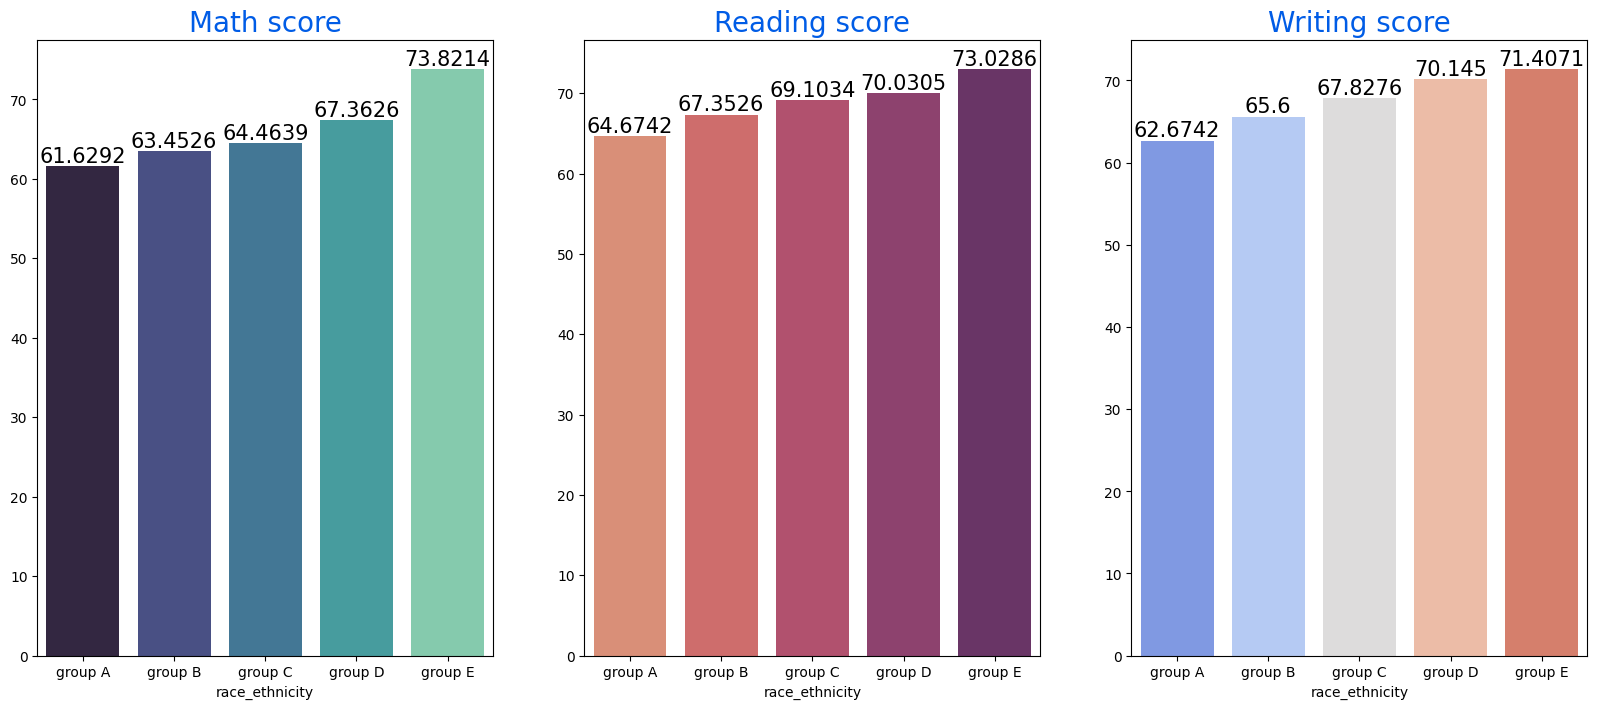

In [70]:
# Bivariate Analysis (does race_ethnicity have any impact on student's performance)

Group_data2 = df.groupby('race_ethnicity')
f,ax = plt.subplots(1,3, figsize = (20, 8))


sns.barplot(x = Group_data2['math_score'].mean().index, y = Group_data2['math_score'].mean().values, palette = 'mako', ax = ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    
sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

In [71]:
# #### Insights 
# - Group E students have scored the highest marks. 
# - Group A students have scored the lowest marks. 
# - Students from a lower Socioeconomic status have a lower avg in all course subjects

In [72]:
# #### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
# - What is educational background of student's parent ?
# - Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

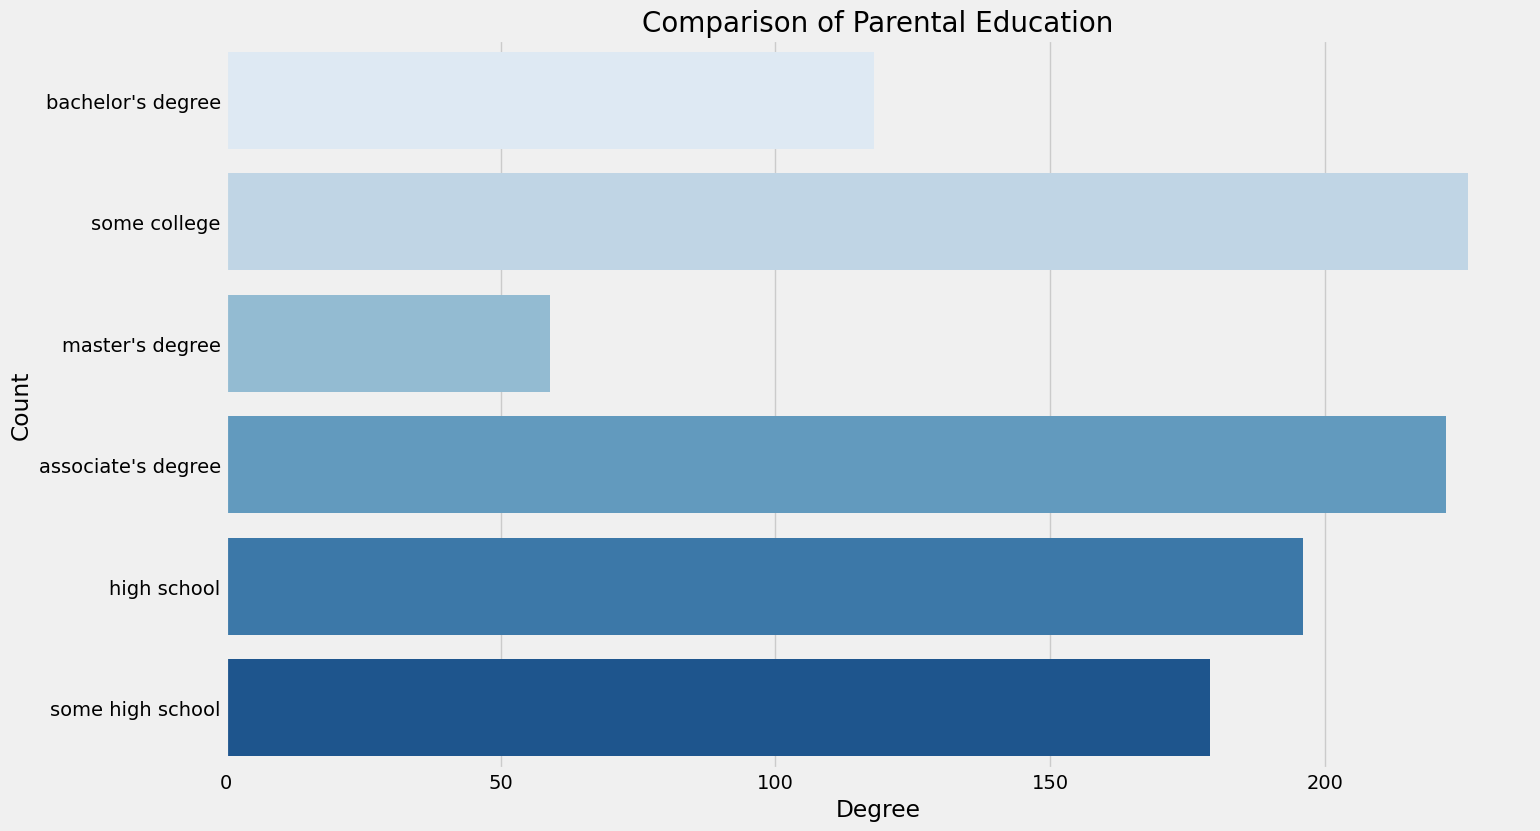

In [74]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize=  20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

In [75]:
## Bivariate Analysis : does parents education have any impact on students performance

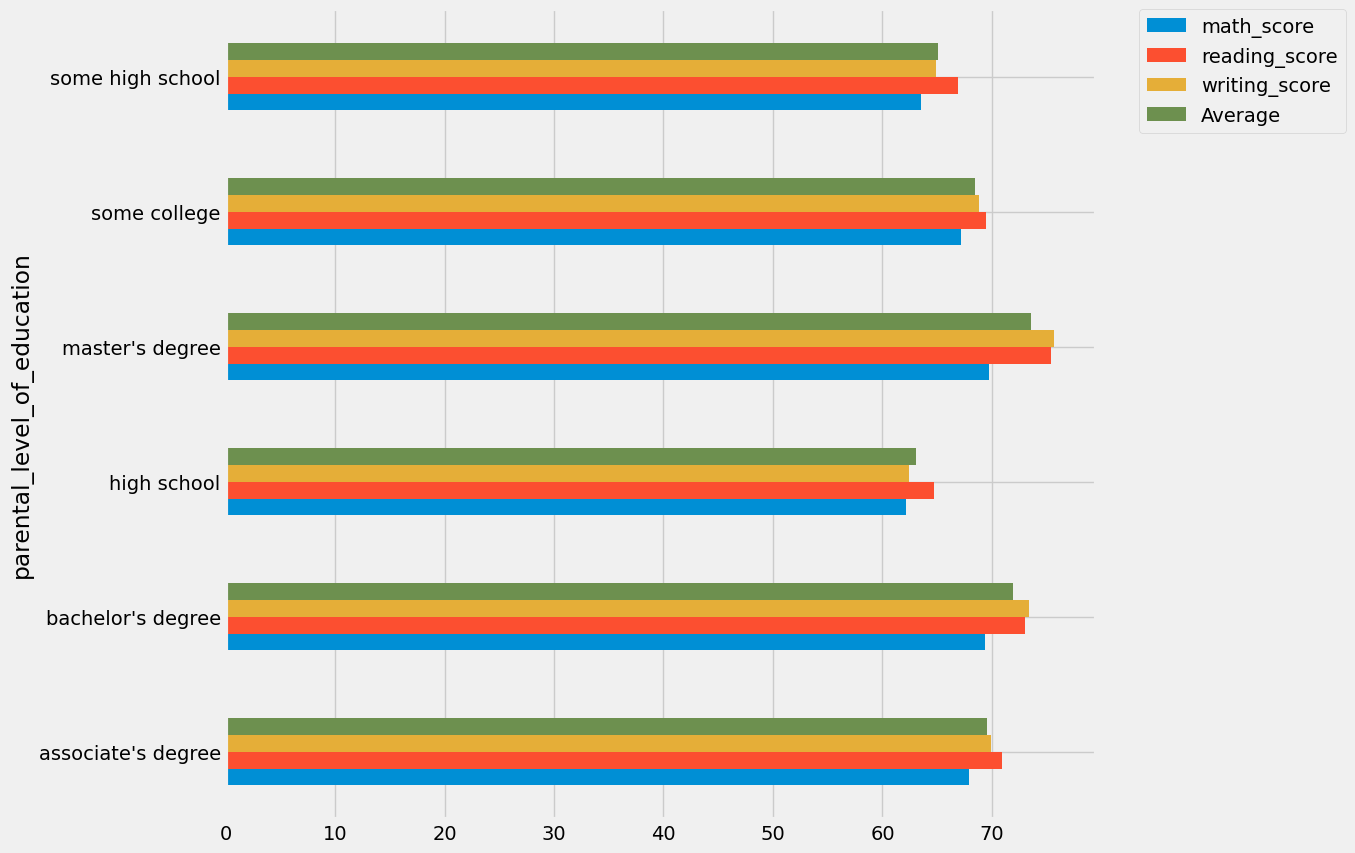

In [79]:
df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score', 'Average']].mean().plot(
    kind='barh', figsize=(10,10)
)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

In [80]:
# #### Insights 
# - The score of student whose parents possess master and bachelor level education are higher than others.

In [ ]:
# #### 4.4.4 LUNCH COLUMN 
# - Which type of lunch is most common amoung students ?
# - What is the effect of lunch type on test results?

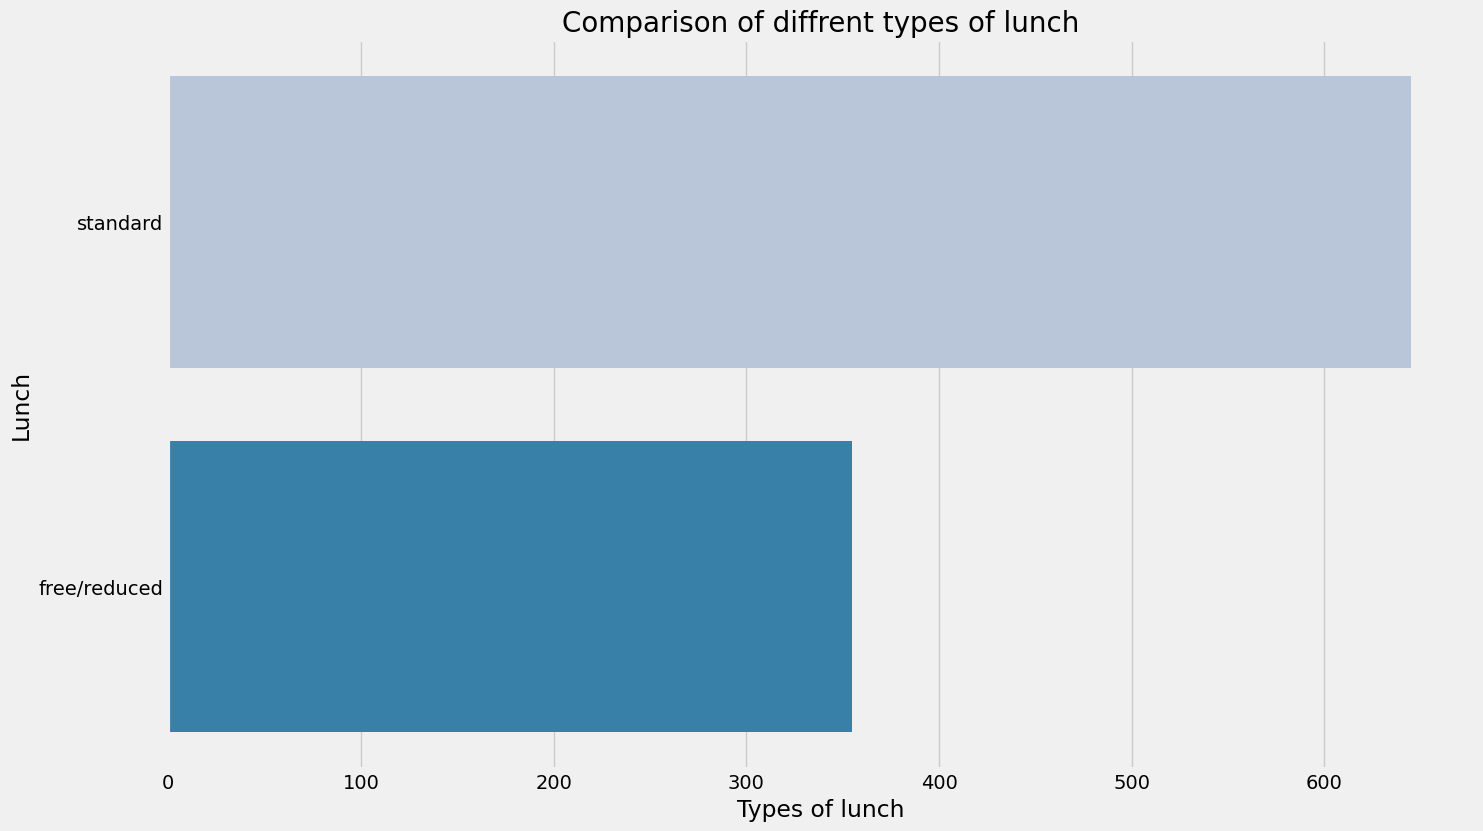

In [83]:
# Univariate Analysis : Which type of lunch is most common among students 

plt.rcParams['figure.figsize'] = (15,9) 
plt.style.use('fivethirtyeight')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of diffrent types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('Types of lunch')
plt.ylabel('Lunch')
plt.show()

In [84]:
# students being served standard lunch was more than that of free/reduced lunch

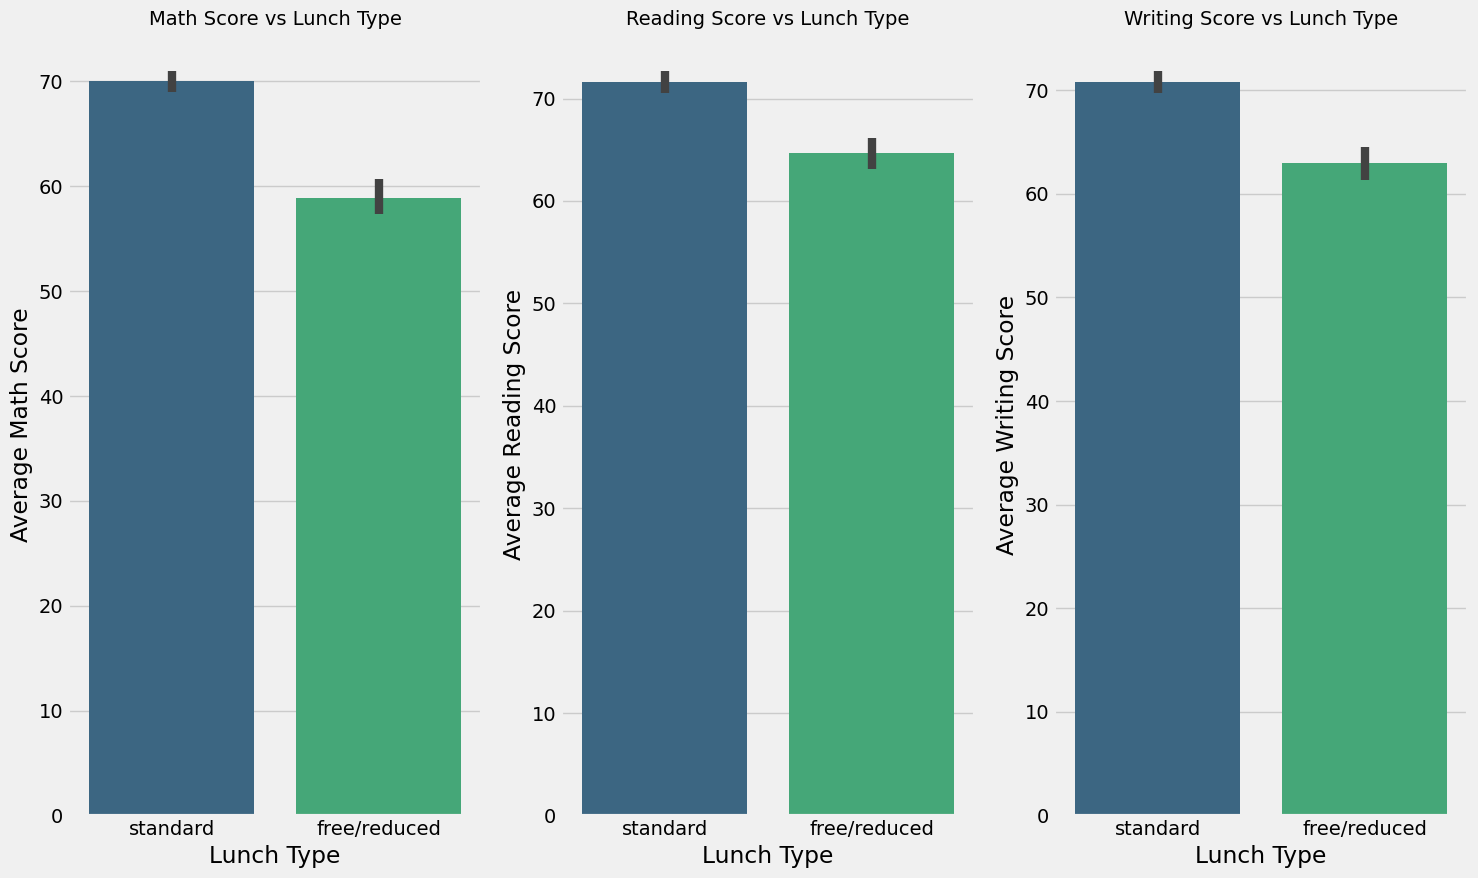

In [85]:
## Bivariate Analysis : (Does type of lunch has impact on student's performance)

# Math score vs Lunch type
plt.subplot(1, 3, 1)
sns.barplot(x='lunch', y='math_score', data=df, palette='viridis')
plt.title('Math Score vs Lunch Type', fontsize=14)
plt.ylabel('Average Math Score')
plt.xlabel('Lunch Type')

# Reading score vs Lunch type
plt.subplot(1, 3, 2)
sns.barplot(x='lunch', y='reading_score', data=df, palette='viridis')
plt.title('Reading Score vs Lunch Type', fontsize=14)
plt.ylabel('Average Reading Score')
plt.xlabel('Lunch Type')

# Writing score vs Lunch type
plt.subplot(1, 3, 3)
sns.barplot(x='lunch', y='writing_score', data=df, palette='viridis')
plt.title('Writing Score vs Lunch Type', fontsize=14)
plt.ylabel('Average Writing Score')
plt.xlabel('Lunch Type')

plt.tight_layout()
plt.show()


In [86]:
# students who get standard lunch tend to perform better than studenst who get free/reduced lunch

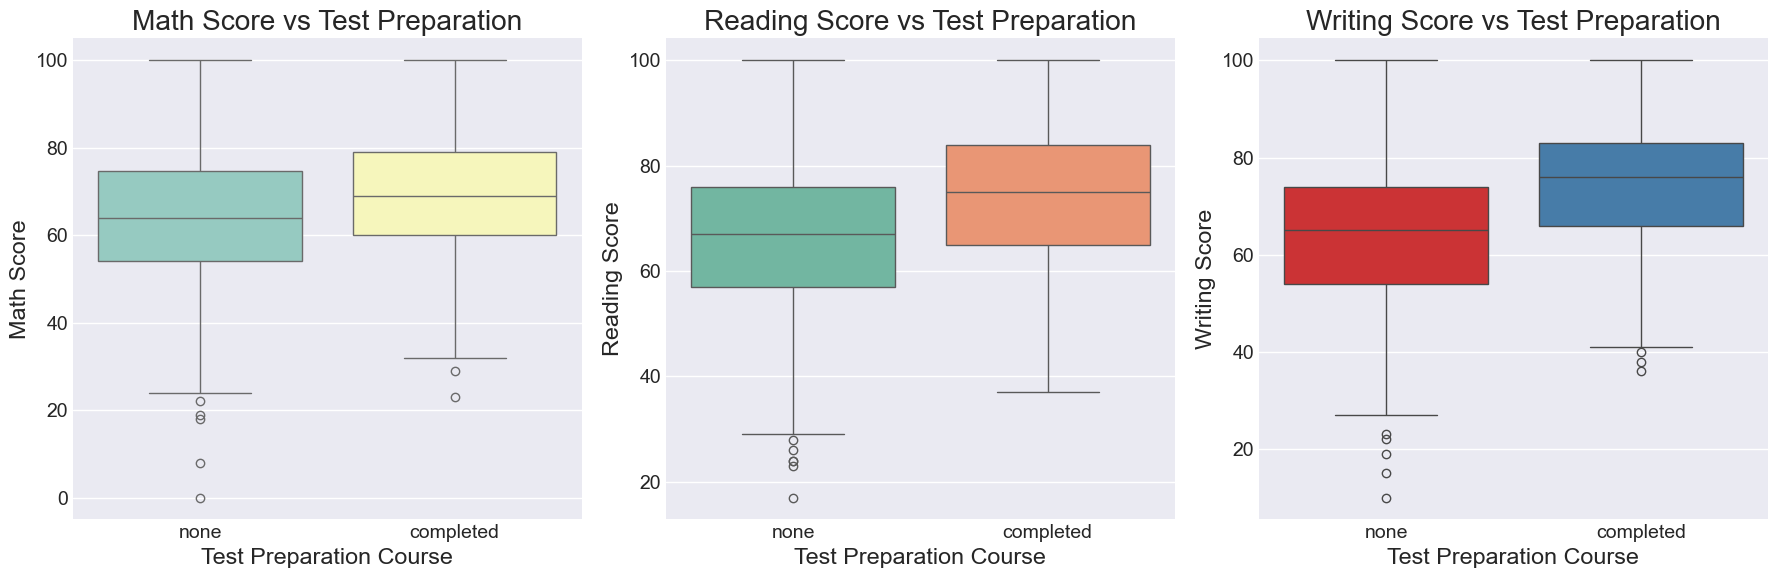

In [93]:
plt.style.use('seaborn-v0_8-darkgrid')  # Valid style
plt.figure(figsize=(18, 6))

# Plot 1: Math Score
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='test_preparation_course', y='math_score', palette='Set3')
plt.title('Math Score vs Test Preparation')
plt.xlabel('Test Preparation Course')
plt.ylabel('Math Score')

# Plot 2: Reading Score
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='test_preparation_course', y='reading_score', palette='Set2')
plt.title('Reading Score vs Test Preparation')
plt.xlabel('Test Preparation Course')
plt.ylabel('Reading Score')

# Plot 3: Writing Score
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='test_preparation_course', y='writing_score', palette='Set1')
plt.title('Writing Score vs Test Preparation')
plt.xlabel('Test Preparation Course')
plt.ylabel('Writing Score')

plt.tight_layout()
plt.show()

In [94]:
# studemts who completed test course tend to score higher in all three categories 

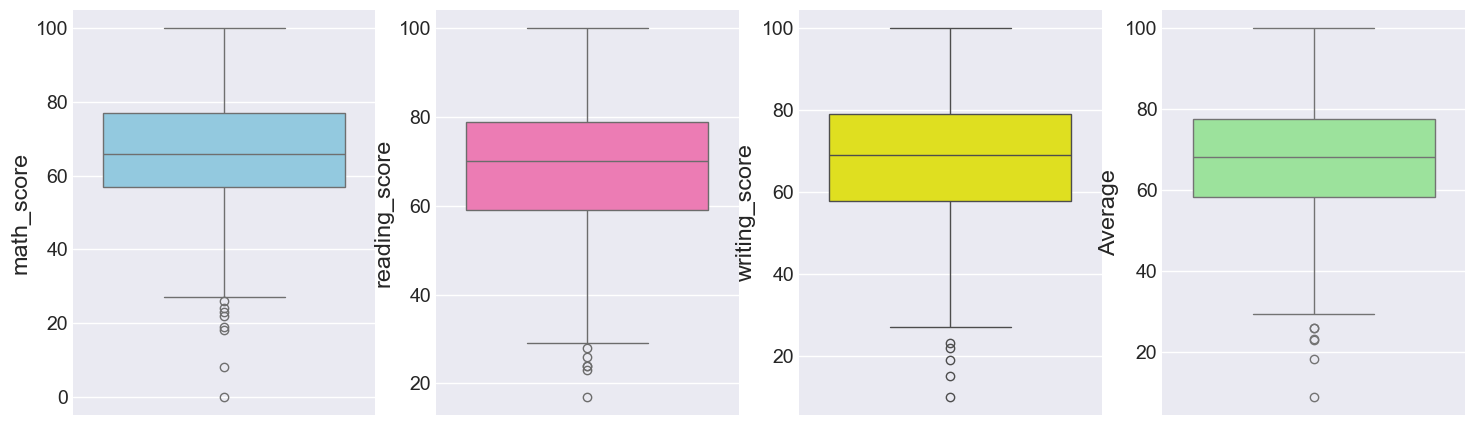

In [97]:
## Checkiing Outliers


plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

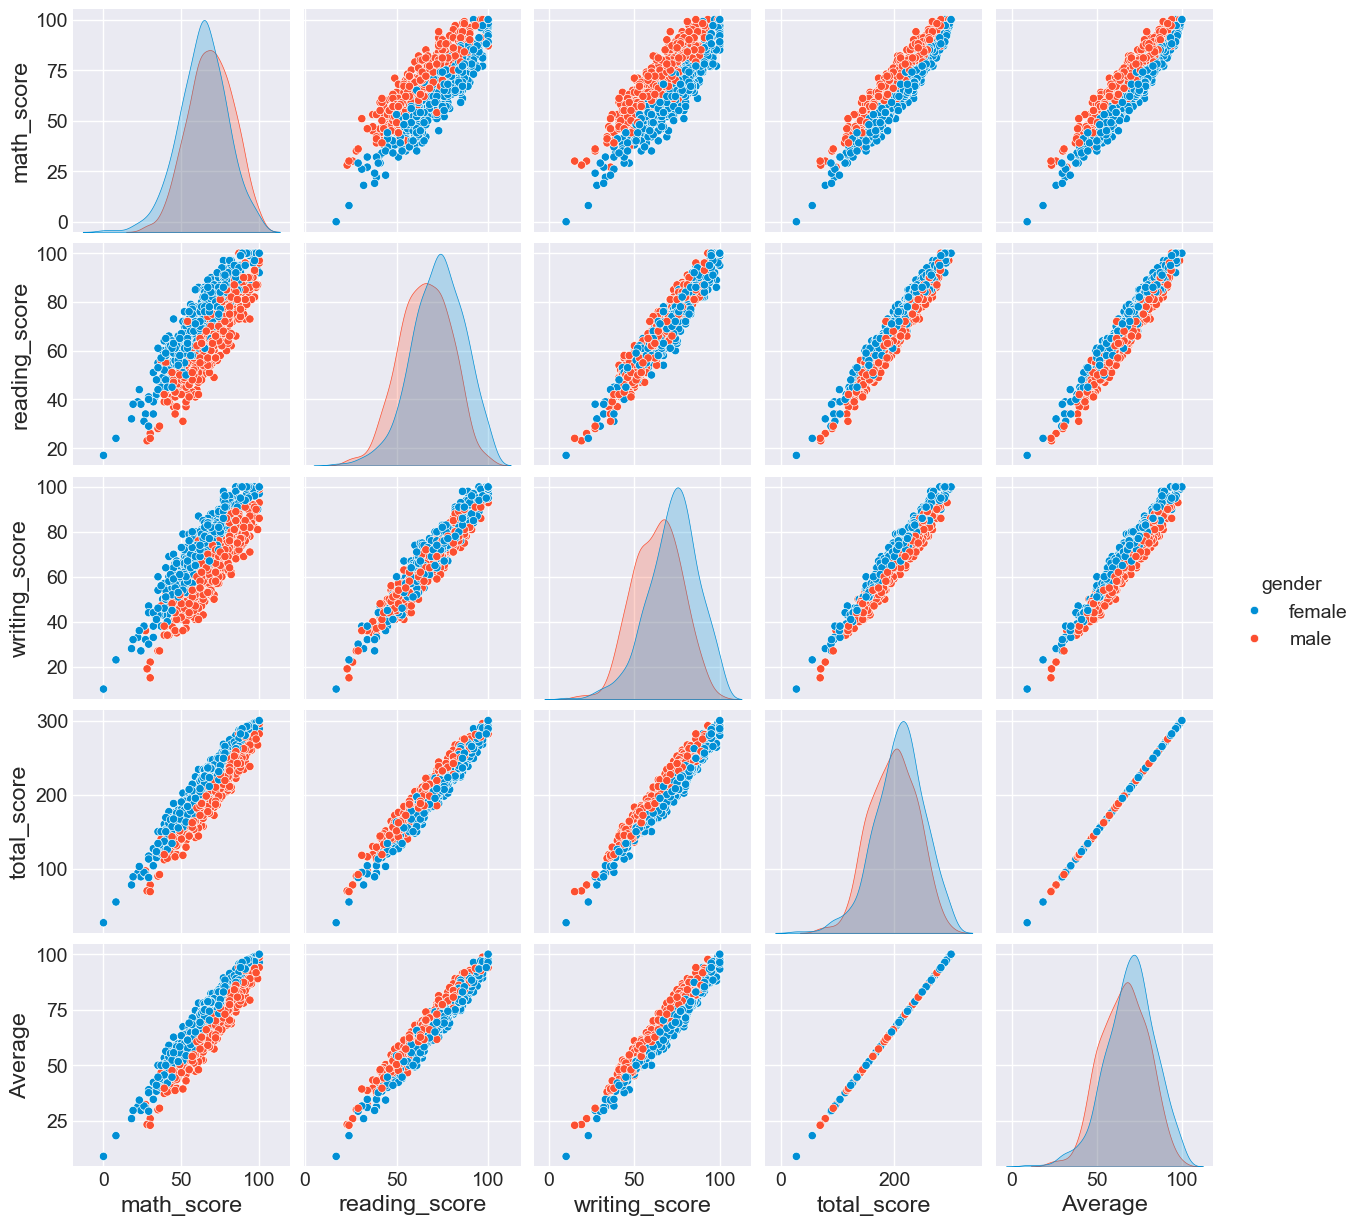

In [98]:
## Multivariate Analysis using Pairplot

sns.pairplot(df,hue = 'gender')
plt.show()

In [ ]:
# #### Insights
# - From the above plot it is clear that all the scores increase linearly with each other.

# ### 5. Conclusions
# - Student's Performance is related with lunch, race, parental level education
# - Females lead in pass percentage and also are top-scorers
# - Student's Performance is not much related with test preparation course
# - Finishing preparation course is benefitial.